In [3]:
import numpy as np
import control

In [4]:
M = np.array([
    [2, 1],
    [1, 1]
])
Phi = np.array([
    [1, 0],
    [0, 0]
])
K = np.array([
    [2, 1],
    [1, 2]
])

$M \ddot{\vec{q}} + \Phi \dot{\vec{q}} + K \vec{q} = B \vec{u}$

**Question: is this system stable? Does the stability depend on the the B matrix?**

In [5]:
np.linalg.eig(M)[0], np.linalg.eig(Phi)[0], np.linalg.eig(K)[0]

(array([2.61803399, 0.38196601]), array([1., 0.]), array([3., 1.]))

In [6]:
MI = np.linalg.inv(M)
A = np.block([
    [np.zeros((2, 2)), np.eye(2)],
    [-MI.dot(K), -MI.dot(Phi)]
])
B = np.array([[0, 0, 0, 1]]).T
B
#np.real(np.linalg.eig(A)[0])
C = np.eye(4)
D = np.zeros((4, 1))

In [7]:
ss = control.ss(A, B, C, D)
ss

A = [[ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [-1.  1. -1. -0.]
 [-0. -3.  1. -0.]]

B = [[0]
 [0]
 [0]
 [1]]

C = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

D = [[0.]
 [0.]
 [0.]
 [0.]]

In [8]:
G = control.ss2tf(ss)
G


Input 1 to output 1:
             1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Input 1 to output 2:
        s^2 + s + 1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Input 1 to output 3:
             s
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Input 1 to output 4:
 s^3 + s^2 + s - 5.551e-17
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

In [9]:
G00 = G[0, 0]
G00


             1
---------------------------
s^4 + s^3 + 4 s^2 + 2 s + 3

Final value:
to a unit step
lim s-> 0 s*G(s)


In [10]:
20*np.log10(G00(0))

(-9.54242509439325+0j)

In [11]:
20*np.log10()

ValueError: invalid number of arguments

In [12]:
1/10**(-75/20)

5623.413251903491

In [13]:
20*np.log10(G[0, 0](0))

(-9.54242509439325+0j)

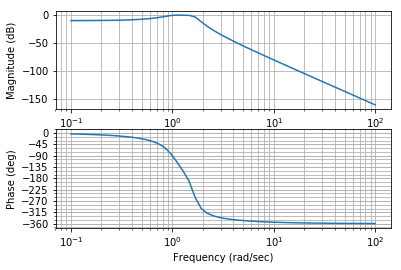

In [14]:
control.bode(G[0, 0], dB=True);

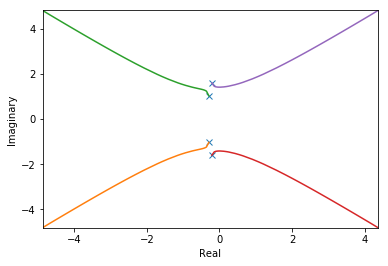

In [16]:
control.rlocus(G[0, 0]);

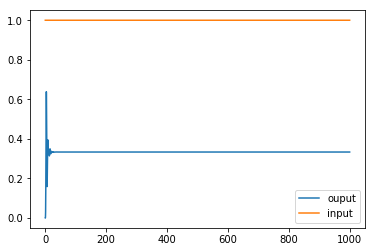

In [59]:
import matplotlib.pyplot as plt
t = np.linspace(0, 1000, 10000)
u = 1*np.ones(len(t)) #np.sin(0.01*t)
t, y, x = control.forced_response(G[0, 0], T=t, U=u)
plt.plot(t, y, label='ouput')
plt.plot(t, u, label='input')
plt.legend()